New test based on video https://www.youtube.com/watch?v=9Q8nEA_0ccg

In [1]:
import gpxpy
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt
import rdp as rdp
import srtm as srtm
import mplleaflet
import glob
import importlib
import sys
import os
from gpx_converter import Converter

sys.path.append("../my_modules")
import toolToReadGPX as ttrgpx

In [2]:
!ls ../data/gpx/RunRite_2025_05_01.gpx

../data/gpx/RunRite_2025_05_01.gpx


# Read gpx

In [3]:
with open("../data/gpx/RunRite_2025_05_01.gpx") as fh:
    gpx_file = gpxpy.parse(fh)

In [4]:
segment = gpx_file.tracks[0].segments[0]
coords = pd.DataFrame([
    {'lat': p.latitude,
     'lon': p.longitude,
     'ele': p.elevation,
     'time': p.time} for p in segment.points])
coords.set_index('time', drop=True, inplace=True)
coords.head(3)

,lat,lon,ele
time,,,
2025-05-01 23:08:26+00:00,45.489555,-73.567904,22.8
2025-05-01 23:08:32+00:00,45.489555,-73.567904,22.8
2025-05-01 23:08:33+00:00,45.489555,-73.567904,22.8


5119 points reduced to 96


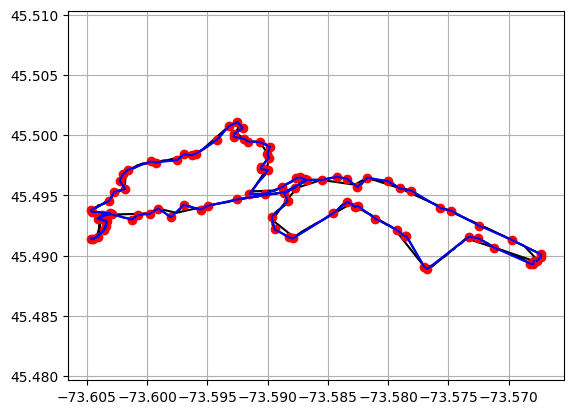

In [5]:
plt.plot(coords['lon'].values, coords['lat'].values,'k');
plt.plot(coords['lon'].values[::100], coords['lat'].values[::100], 'k');

val_epsilon = 1e-4
simple_coords = rdp.rdp(coords[['lon','lat']].values, epsilon = val_epsilon)
print("{} points reduced to {}".format(coords.shape[0], simple_coords.shape[0]))

plt.plot(simple_coords[:,0], simple_coords[:,1],'ro')
plt.plot(simple_coords[:,0], simple_coords[:,1],'b-')

plt.axis('equal')
plt.grid('on')

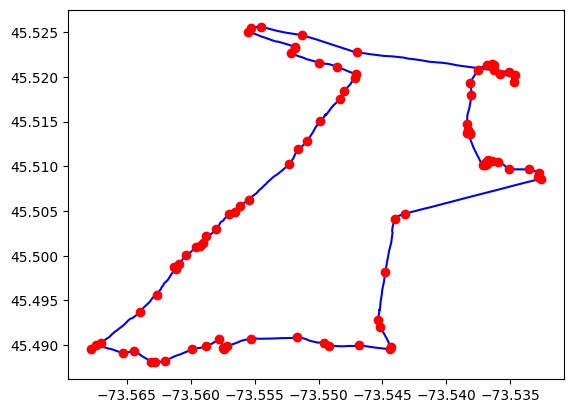

In [6]:
# gpx to dataFrame
gpx_df = Converter(input_file='../data/gpx/RunRite_2025_01_02.gpx').gpx_to_dataframe()
gpx_reduced_df = gpx_df

# reduce size
val_epsilon = 1e-4
mask   = rdp.rdp(gpx_df[['longitude','latitude']].values, epsilon = val_epsilon, return_mask=True)
gpx_reduced_df = gpx_reduced_df.iloc[mask,:]

# dataFrame to gpx
Converter.dataframe_to_gpx(input_df=gpx_reduced_df,
                           lats_colname='latitude',
                           longs_colname='longitude',
                           output_file='test33.gpx');
    
# reload reduced data
gpx_rdp_df = Converter(input_file='test33.gpx').gpx_to_dataframe()

plt.plot(gpx_df['longitude'].values, gpx_df['latitude'].values,'b')
plt.plot(gpx_rdp_df['longitude'].values, gpx_rdp_df['latitude'].values,'ro')



# Code to clean the gps traces with rdp algorithm and save as gpx files

In [49]:
!ls ../tmp/*

../tmp/season1.gpx                ../tmp/season1_2018_03_22_rdp.gpx
../tmp/season1_2017_09_14_rdp.gpx ../tmp/season1_2018_03_29_rdp.gpx
../tmp/season1_2017_09_21_rdp.gpx ../tmp/season1_2018_04_05_rdp.gpx
../tmp/season1_2017_09_28_rdp.gpx ../tmp/season1_2018_04_12_rdp.gpx
../tmp/season1_2017_10_05_rdp.gpx ../tmp/season1_2018_04_19_rdp.gpx
../tmp/season1_2017_10_12_rdp.gpx ../tmp/season1_2018_04_26_rdp.gpx
../tmp/season1_2017_10_19_rdp.gpx ../tmp/season1_2018_05_03_rdp.gpx
../tmp/season1_2017_10_26_rdp.gpx ../tmp/season1_2018_05_10_rdp.gpx
../tmp/season1_2017_11_02_rdp.gpx ../tmp/season1_2018_05_17_rdp.gpx
../tmp/season1_2017_11_09_rdp.gpx ../tmp/season1_2018_05_24_rdp.gpx
../tmp/season1_2017_11_16_rdp.gpx ../tmp/season1_2018_05_31_rdp.gpx
../tmp/season1_2017_11_23_rdp.gpx ../tmp/season1_2018_06_07_rdp.gpx
../tmp/season1_2017_11_30_rdp.gpx ../tmp/season1_2018_06_14_rdp.gpx
../tmp/season1_2017_12_14_rdp.gpx ../tmp/season1_2018_06_28_rdp.gpx
../tmp/season1_2017_12_21_rdp.gpx ../tmp/season1

In [50]:
!rm ../tmp/*

In [51]:
!ls ../tmp/*

zsh:1: no matches found: ../tmp/*


In [52]:
club_name    = "RunRite"
year_start   = 2024
season       = year_start - 2016
list_df      = []
val_epsilon  = 1e-4
dir_in_data  = '../data/gpx/'
dir_out_data = '../tmp/'
list_path  = []
list_path1 = glob.glob('{}RunRite_{}_09_1[4-9].gpx'.format(dir_in_data,str(year_start)))     # September after 14th 
list_path2 = glob.glob('{}RunRite_{}_09_2[0-9].gpx'.format(dir_in_data,str(year_start)))     #        til end of the September
list_path3 = glob.glob('{}RunRite_{}_1[012]_*.gpx'.format(dir_in_data,str(year_start)))      # October to December that year
list_path4 = glob.glob('{}RunRite_{}_0[1-8]_*.gpx'.format(dir_in_data,str(year_start + 1)))  # January to August following year
list_path5 = glob.glob('{}RunRite_{}_09_0[1-9].gpx'.format(dir_in_data,str(year_start + 1))) # September following year
list_path6 = glob.glob('{}RunRite_{}_09_1[0-3].gpx'.format(dir_in_data,str(year_start + 1))) #        til 13th of September
list_all_files = list_path1 + list_path2 + list_path3 + list_path4 + list_path5 + list_path6
list_path.sort()

print(list_all_files)
print("\nThere are {} runs this RunRite Season {} {}-{}.".format(len(list_all_files), season, str(year_start), str(year_start+1)))
print(list_all_files[0],list_all_files[-1])

['../data/gpx/RunRite_2024_09_19.gpx', '../data/gpx/RunRite_2024_09_26.gpx', '../data/gpx/RunRite_2024_11_07.gpx', '../data/gpx/RunRite_2024_11_28.gpx', '../data/gpx/RunRite_2024_11_14.gpx', '../data/gpx/RunRite_2024_10_24.gpx', '../data/gpx/RunRite_2024_10_31.gpx', '../data/gpx/RunRite_2024_12_19.gpx', '../data/gpx/RunRite_2024_10_10.gpx', '../data/gpx/RunRite_2024_12_05.gpx', '../data/gpx/RunRite_2024_12_12.gpx', '../data/gpx/RunRite_2024_10_03.gpx', '../data/gpx/RunRite_2024_10_17.gpx', '../data/gpx/RunRite_2024_11_22.gpx', '../data/gpx/RunRite_2025_02_27.gpx', '../data/gpx/RunRite_2025_05_01.gpx', '../data/gpx/RunRite_2025_02_20.gpx', '../data/gpx/RunRite_2025_04_24.gpx', '../data/gpx/RunRite_2025_03_13.gpx', '../data/gpx/RunRite_2025_01_16.gpx', '../data/gpx/RunRite_2025_01_02.gpx', '../data/gpx/RunRite_2025_03_06.gpx', '../data/gpx/RunRite_2025_04_10.gpx', '../data/gpx/RunRite_2025_01_09.gpx', '../data/gpx/RunRite_2025_01_23.gpx', '../data/gpx/RunRite_2025_03_27.gpx', '../data/gp

In [53]:
# get list of gpx files as dataFrame
#list_gpx_df = [ttrgpx.fun_gpx2pd(single_gpx) for single_gpx in list_all_files]
list_gpx_df = [Converter(input_file=f).gpx_to_dataframe() for f in list_all_files]

# apply rdp to dataFrame in list of dataFrame
list_gpx_rdp_df = [ttrgpx.fun_DownSample_gpx_rdp(x, par_epsilon = val_epsilon) for x in list_gpx_df]

# create two lists of csv and gpx filenames:
list_csv_file_name = ['{}season{}_{}_rdp.csv'.format(dir_out_data,str(season),f[-14:-4]) for f in list_all_files]
list_gpx_file_name = ['{}season{}_{}_rdp.gpx'.format(dir_out_data,str(season),f[-14:-4]) for f in list_all_files]

# now use those lists to save files in csv and gpx
for c,df_ in enumerate(list_gpx_rdp_df):
    # df -> csv
    df_.to_csv(list_csv_file_name[c], index=False)
    # csv -> gpx
    Converter(input_file=list_csv_file_name[c]).csv_to_gpx(lats_colname='latitude',
                                                          longs_colname='longitude',
                                                          output_file=list_gpx_file_name[c])

# and now create one csv and one gpx file for all traces of the list: 
gpx_season_rdp_df = pd.concat(list_gpx_rdp_df)
gpx_season_rdp_df.reset_index();

# verify I have all saved properly
file_name_output_csv = '{}season{}.csv'.format(dir_out_data,str(season))
file_name_output_gpx = '{}season{}.gpx'.format(dir_out_data,str(season))

# df -> csv
gpx_season_rdp_df.to_csv(file_name_output_csv, index=False)
# csv -> gpx
Converter(input_file=file_name_output_csv).csv_to_gpx(lats_colname='latitude',
                                                      longs_colname='longitude',
                                                      output_file=file_name_output_gpx)

True

In [55]:
!ls ../tmp/*csv
!rm ../tmp/*csv

zsh:1: no matches found: ../tmp/*csv
zsh:1: no matches found: ../tmp/*csv


# Plot Plot Plot

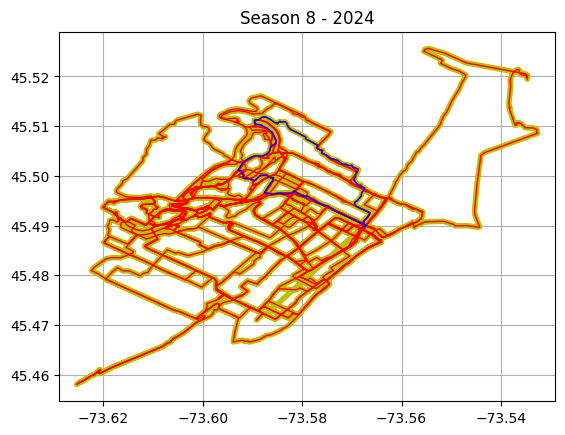

In [60]:
# plot the single file with all traces
plt.figure()
plt.title("Season {} - {}".format(str(season),str(year_start)));

plt.plot(gpx_season_rdp_df['longitude'].values, gpx_season_rdp_df['latitude'].values,'y', linewidth=4)
         
for f in list_gpx_file_name:
    gpx_one_run_df = Converter(input_file = f).gpx_to_dataframe() # by loading the previously created gpx_rdp file
    plt.plot(gpx_one_run_df['longitude'].values, gpx_one_run_df['latitude'].values,'r', linewidth=1)

plt.plot(gpx_one_run_df['longitude'].values, gpx_one_run_df['latitude'].values,'b', linewidth=1)# replot the last recorded trace
plt.axis('equal')
plt.grid('on')

# Do some stuffs for the yaml config to create the map online

In [ ]:
for f in list_gpx_file_name:
    head_tail = os.path.split(f)
    print("{}'.format(head_tail[1])

In [62]:
for f in list_gpx_file_name:
    head_tail = os.path.split(f)
    print("- Style: <LineSymbolizer stroke='red' stroke-width='4' stroke-linecap='round' stroke-opacity='0.7' stroke-linejoin='bevel'/>")
    print("  SRS: '+init=epsg:4326'")
    print('  Type: ogr')
    print('  File: {}'.format(head_tail[1]))
    print('  Layer: tracks\n')


- Style: <LineSymbolizer stroke='red' stroke-width='4' stroke-linecap='round' stroke-opacity='0.7' stroke-linejoin='bevel'/>
  SRS: '+init=epsg:4326'
  Type: ogr
  File: season8_2024_09_19_rdp.gpx
  Layer: tracks

- Style: <LineSymbolizer stroke='red' stroke-width='4' stroke-linecap='round' stroke-opacity='0.7' stroke-linejoin='bevel'/>
  SRS: '+init=epsg:4326'
  Type: ogr
  File: season8_2024_09_26_rdp.gpx
  Layer: tracks

- Style: <LineSymbolizer stroke='red' stroke-width='4' stroke-linecap='round' stroke-opacity='0.7' stroke-linejoin='bevel'/>
  SRS: '+init=epsg:4326'
  Type: ogr
  File: season8_2024_11_07_rdp.gpx
  Layer: tracks

- Style: <LineSymbolizer stroke='red' stroke-width='4' stroke-linecap='round' stroke-opacity='0.7' stroke-linejoin='bevel'/>
  SRS: '+init=epsg:4326'
  Type: ogr
  File: season8_2024_11_28_rdp.gpx
  Layer: tracks

- Style: <LineSymbolizer stroke='red' stroke-width='4' stroke-linecap='round' stroke-opacity='0.7' stroke-linejoin='bevel'/>
  SRS: '+init=epsg:

After that, go on the printmaps-osm and request a print.

Download the image and save as:
+"map_RR_Season#_20##-20##_oneGPXfile.png" 
or map_RR_Season#_20##-20##_allPXfiles.png